# Reading Quiz 6
### How to make a map from the CDC Wonder Data

First we need to install a package called `mapdata`

In [1]:
install.packages("mapdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Now we need to load a bunch of libraries, including the one we just installed.

In [2]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



We installed that package, because it had data neededs to make a map of the USA, so we shall load that data and call it `states`. After that we shall load in the data from CDC Wonder, I've used the simplest I could find... it is just death rates by State, but the following should work for any CDC Wonder data which was downloaded with the States as a variable.

In [3]:
#This makes a data frame with state geographic information
coord<-map_data("state") 
#This loads in data from the cdc about state by state mortality
states.death<-read.delim("StateByStateDeath.txt") 

## Problem 1

(a) View the heads of each of the data frames `coord` and `states.death`. 

In [4]:
#states
head(coord)
#states.death
head(states.death)

long,lat,group,order,region,subregion
-87.46201,30.38968,1,1,alabama,NA
-87.48493,30.37249,1,2,alabama,NA
-87.52503,30.37249,1,3,alabama,NA
-87.53076,30.33239,1,4,alabama,NA
-87.57087,30.32665,1,5,alabama,NA
-87.58806,30.32665,1,6,alabama,NA


Notes,State,State.Code,Deaths,Population,Crude.Rate
,Alabama,1,860829,84016831,1024.6
,Alaska,2,63378,12360948,512.7
,Arizona,4,838107,109191391,767.6
,Arkansas,5,522965,51115387,1023.1
,California,6,4307063,657732064,654.8
,Colorado,8,561298,87520147,641.3


We are going to use the longitude (`long`) and latitude (`lat`) as x- and y-coordinates respectively to use ggplot to make our map. To do this we are going to need to attach another column to `coord` which has the `Crude.Rate` of `states.death` for each state which is the coordinates is in.

We will do this using an `inner_join`. 

(b) Which columns from `coord` and `states.death` are we going to need to join on?

Answer:

## Problem 2 - Joining the data

There is a problem... `coord` and `state.death` use different syntax for the `region` and `State` variable respectively. So we are going to have to use `mutate` on `states.death` to make the variable match that in `coord` so that we can perform the join.

a) Fix the case issue for the `State` variable in `states.death` (Hint: Use the `tolower` function) and change the name of the variable to `region.

In [6]:
#Fix the case issue
states.clean<-mutate(states.death,State=tolower(State)) %>% #makes the state names lower case so they match the map_data versions
mutate(region=State) # adds a new column 

b) Join `states.clean` with `coord` to make `coord.death`.

In [7]:
#Use an inner join
coord.death<-inner_join(states.clean,coord) #makes a new table which adds the cdc mortality numbers to the states dataframe

Joining, by = "region"


## Problem 3

Now use the data and `ggplot2` to Plot the map. 

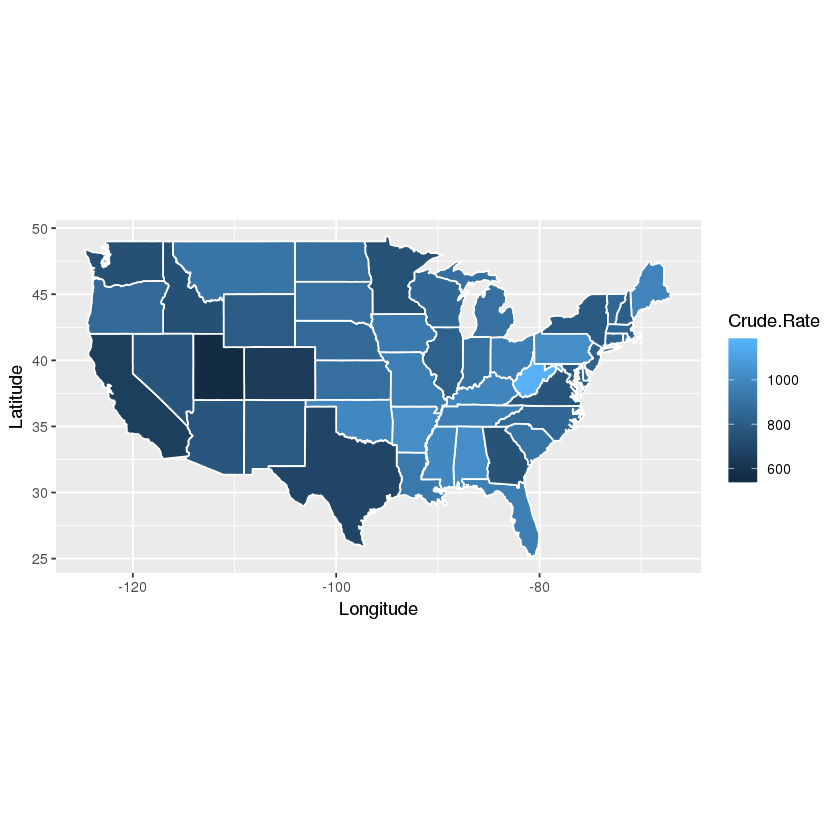

In [8]:
ggplot(data = coord.death) + 
  geom_polygon(aes( x=long,y=lat,fill = Crude.Rate, group=group), color = "white") + 
  coord_fixed(1.3) +  
  ylab("Latitude") +   
  xlab("Longitude")

## Problem 4

Now it is your turn, the following code loads data which has state by state opioid death rate, make the map above, but use this data instead.

In [9]:
#This loads in data from the cdc about state by state mortality
states.opioid<-read.delim("StateByStateOpioid.txt") 

In [13]:
#Your work here
opioid.map<-mutate(states.opioid,region=tolower(State)) %>%
inner_join(coord) %>%
ggplot() + 
  geom_polygon(aes( x=long,y=lat,fill = Crude.Rate, group=group), color = "white") + 
  coord_fixed(1.3) +  
  ylab("Latitude") +   
  xlab("Longitude")

Joining, by = "region"


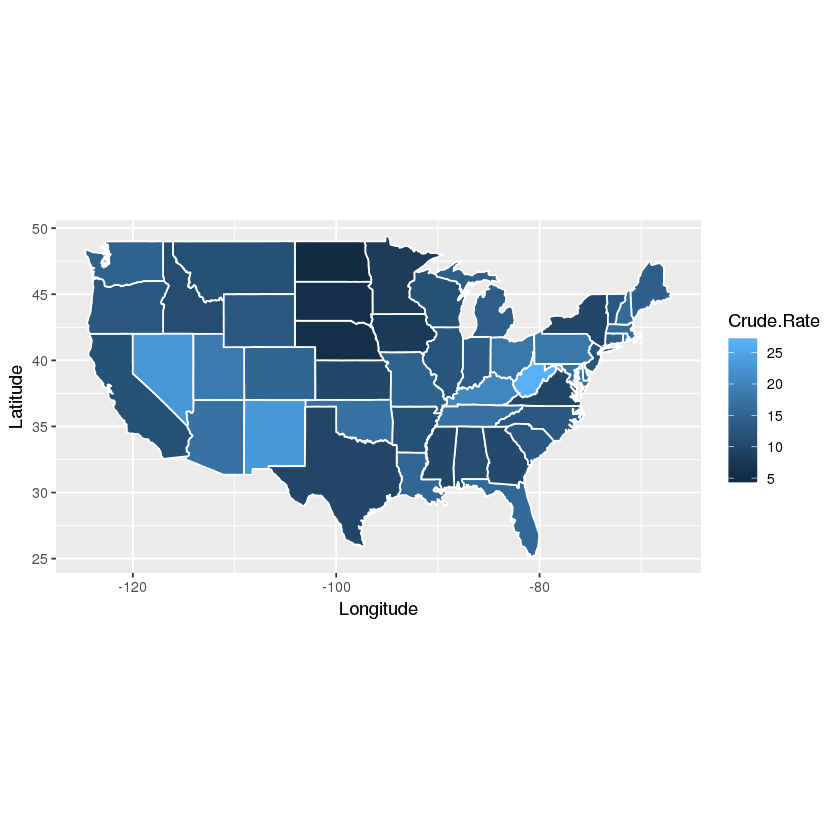

In [14]:
opioid.map